In [4]:
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
#df=pd.read_excel("sisab/reg_mun.xlsx")

def extract():
    #Procure por "[]" na saida pra lidar com duas incosistências (Distrito Federal + Santo antônio do leverger), códigos incluindos a mão olhando no ibge
    df=pd.read_excel("sisab/reg_mun.xlsx")
    shapefile="/home/lucas/projetos/sisab/saude-basica/mapas/BR_Municipios_2022/BR_Municipios_2022.shp"
    mapa=gpd.read_file(shapefile)
    mapa["NM_MUN"]=mapa["NM_MUN"].str.upper()
    mun=[]
    for i in df.itertuples():
        mun=mun+[mapa[(mapa["NM_MUN"]==i[2].upper()) & (mapa["SIGLA_UF"]==i[1])]["CD_MUN"].to_string(index=False)]
    df.insert(len(df.columns),"CD_MUN",mun)
    df.to_csv("out.csv")
def mapa(UF):
    os.mkdir("shapefiles/"+UF+"/")
    df=pd.read_csv("out.csv")
    shapefile="/home/lucas/projetos/sisab/saude-basica/mapas/"+UF+"_Municipios_2022/"+UF+"_Municipios_2022.shp"
    mapa=gpd.read_file(shapefile)
    regioes={}
    for i in df[df["uf"]==UF].itertuples():
        if i[5] not in regioes.keys():
            regioes.update({i[5]:(i[6],[str(i[7])])})
        else:
            regioes.update({i[5]:(i[6],regioes[i[5]][1]+[str(i[7])])})  
    newdf=mapa
    for i in regioes:
        newdf=mapa[mapa["CD_MUN"].isin(regioes[i][1])]
        os.mkdir("shapefiles/"+UF+"/"+str(i)+"/")
        gdf=gpd.GeoDataFrame(newdf)
        gdf.to_file("shapefiles/"+UF+"/"+str(i)+"/"+str(i)+".shp")
def allShapeFiles():
    estados=["AC","AL","AP","AM","BA","CE","DF","ES","GO","MA","MT","MS","MG","PA","PB","PR","PE","PI","RJ","RN","RS","RO","RR","SC","SP","SE","TO"]
    for estado in estados:
        mapa(estado)

TypeError: unsupported operand type(s) for +: 'set' and 'list'

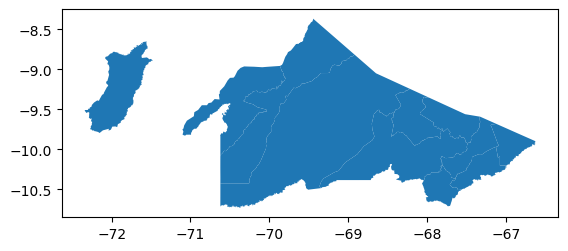

In [9]:
def svgMapa(i):
        mapa=gpd.read_file("shapefiles/"+str(i)+"/"+str(i)+".shp")
        colors=np.zeros(len(mapa.geometry))
        colors[-1]=0
        fig=px.choropleth(
            mapa,
            geojson=mapa.geometry,
            locations=mapa.index,
            color=colors
        )
        fig.update_geos(fitbounds="locations", visible=False)
        fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
        fig.show()
def allMaps():
    estados=["AC","AL","AP","AM","BA","CE","DF","ES","GO","MA","MT","MS","MG","PA","PB","PR","PE","PI","RJ","RN","RS","RO","RR","SC","SP","SE","TO"]
    df=pd.read_csv("tabelaMunicipiosRegioesSaudeIBGE.csv")
    foi=[]
    os.mkdir("svg")
    for estado in estados:
        os.mkdir("svg/"+estado)
        for i in df[df["uf"]==estado].itertuples():
             if i[5] not in foi:
                  gdf=gpd.read_file("shapefiles/"+estado+"/"+str(i[5])+"/"+str(i[5])+".shp")
                  fig,ax=plt.subplots()
                  gdf.plot(ax=ax)
                  svg_path="svg/"+estado+"/"+str(i[5])+"/"
                  os.mkdir(svg_path)
                  fig.savefig(svg_path+str(i[5]),format='svg')
                  foi=foi+[i[5]]

allMaps()